In [373]:
pip install seaborn


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [375]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import datasets, linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [377]:
df = pd.read_csv('C:/Users/Admin/Downloads/spotify_iitd1.csv')

In [379]:
df.head() #df.head() method in Pandas is used to display the first few rows of a DataFrame

track_id                 artists  \
0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1         0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2         0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3         0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4         0.618  0.4430    2    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature track_genre  
0          0.000001    0.3580    0.715   87.917               4    acoustic  
1          0.000006    0.1010    0.267   77.489               4    acoustic  
2          0.000000    0.1170    0.120   76.332               4    acoustic  
3          0.000071    0.1320    0.143  181.740               3    acoustic  
4          0.000000    0.0829    0.167  119.949               4    acoustic

In [381]:
df.shape

(114000, 20)

In [383]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [385]:
df.isnull().sum() #df.isnull().sum() in pandas is used to count the number of missing (null or NaN) values in each column of a DataFrame
# artists, album_name and track_name needs to be looked at

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [387]:
df.describe() #df.describe() method in pandas provides a summary of descriptive statistics for a DataFrame.


popularity   duration_ms   danceability         energy  \
count  114000.000000  1.140000e+05  114000.000000  114000.000000   
mean       33.238535  2.280292e+05       0.566800       0.641383   
std        22.305078  1.072977e+05       0.173542       0.251529   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%        17.000000  1.740660e+05       0.456000       0.472000   
50%        35.000000  2.129060e+05       0.580000       0.685000   
75%        50.000000  2.615060e+05       0.695000       0.854000   
max       100.000000  5.237295e+06       0.985000       1.000000   

                 key       loudness           mode    speechiness  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        5.309140      -8.258960       0.637553       0.084652   
std         3.559987       5.029337       0.480709       0.105732   
min         0.000000     -49.531000       0.000000       0.000000   
25%         2.000000     -10.013000       0.000000       0.035900   
50%         5.000000      -7.004000       1.000000       0.048900   
75%         8.000000      -5.003000       1.000000       0.084500   
max        11.000000       4.532000       1.000000       0.965000   

        acousticness  instrumentalness       liveness        valence  \
count  114000.000000     114000.000000  114000.000000  114000.000000   
mean        0.314910          0.156050       0.213553       0.474068   
std         0.332523          0.309555       0.190378       0.259261   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.016900          0.000000       0.098000       0.260000   
50%         0.169000          0.000042       0.132000       0.464000   
75%         0.598000          0.049000       0.273000       0.683000   
max         0.996000          1.000000       1.000000       0.995000   

               tempo  time_signature  
count  114000.000000   114000.000000  
mean      122.147837        3.904035  
std        29.978197        0.432621  
min         0.000000        0.000000  
25%        99.218750        4.000000  
50%       122.017000        4.000000  
75%       140.071000        4.000000  
max       243.372000        5.000000

In [389]:
#Feature Engineering - Top Artists / Albumns ¶
# Filter based on songs that are "Popular" or "Somewhat Popular"
song_info_data_popular = df[df["popularity"] >= 70]

In [391]:
print("Number of Unique artists:")
print(song_info_data_popular['artists'].nunique())

print("\nNumber of unique albums:")
print(song_info_data_popular['album_name'].nunique())


Number of Unique artists:
1826

Number of unique albums:
2447


In [393]:
# Top 200 Artists among Popular / Somewhat Popular songs
top_200_artists = song_info_data_popular['artists'].value_counts().head(200)
print(top_200_artists.head(10), "\n")

# If among the top 200 artists, set value to 1. Otherwise, set to 0.
df["artists"] = [ 1 if (i in top_200_artists) else 0 for i in df.artists ]
df["artists"].value_counts()

BTS                      60
Bad Bunny                48
The Neighbourhood        45
Red Hot Chili Peppers    44
Arctic Monkeys           38
Linkin Park              36
Adele                    36
The Beatles              31
OneRepublic              30
Nirvana                  30
Name: artists, dtype: int64 



0    106259
1      7741
Name: artists, dtype: int64

In [395]:
# Remove duplicates + unnecessary variables
df.drop_duplicates(subset=['track_id'], keep='first',inplace=True)
df.drop(['artists','track_name','track_id','key'],axis=1, inplace=True)

In [397]:
# Data cleaning and arrangement
#This line performs one-hot encoding on the "time\_signature" column of the DataFrame df.
# pd.get_dummies() converts categorical variables into dummy/indicator variables. 
#For each unique value in "time\_signature" , a new column is created in time_signature_df. If a row had "4/4" as its time signature, the "4/4" column in time_signature_df would have a 1, and all other time signature columns would have a 0.
time_signature_df=pd.get_dummies(df["time_signature"])
df = pd.concat([df,time_signature_df],axis=1)
df['mode'] = np.where(df['mode']=='Major', 1, 0)

In [399]:
# change songs duration from milliseconds to seconds
df['duration_ms'] = df['duration_ms'] / 1000
df.rename(columns={'duration_ms': 'duration_s'}, inplace=True) 

In [401]:
df.shape

(89741, 21)

In [403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89741 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   album_name        89740 non-null  object 
 1   popularity        89741 non-null  int64  
 2   duration_s        89741 non-null  float64
 3   explicit          89741 non-null  bool   
 4   danceability      89741 non-null  float64
 5   energy            89741 non-null  float64
 6   loudness          89741 non-null  float64
 7   mode              89741 non-null  int32  
 8   speechiness       89741 non-null  float64
 9   acousticness      89741 non-null  float64
 10  instrumentalness  89741 non-null  float64
 11  liveness          89741 non-null  float64
 12  valence           89741 non-null  float64
 13  tempo             89741 non-null  float64
 14  time_signature    89741 non-null  int64  
 15  track_genre       89741 non-null  object 
 16  0                 89741 non-null  uint8

In [405]:
df.isnull().sum() #df.isnull().sum() in pandas is used to count the number of missing (null or NaN) values in each column of a DataFrame
df.describe() #df.describe() method in pandas provides a summary of descriptive statistics for a DataFrame.


popularity    duration_s  danceability        energy      loudness  \
count  89741.000000  89741.000000  89741.000000  89741.000000  89741.000000   
mean      33.198438    229.141812      0.562166      0.634458     -8.499004   
std       20.580824    112.947741      0.176691      0.256605      5.221490   
min        0.000000      0.000000      0.000000      0.000000    -49.531000   
25%       19.000000    173.040000      0.450000      0.457000    -10.322000   
50%       33.000000    213.293000      0.576000      0.676000     -7.185000   
75%       49.000000    264.293000      0.692000      0.853000     -5.108000   
max      100.000000   5237.295000      0.985000      1.000000      4.532000   

          mode   speechiness  acousticness  instrumentalness      liveness  \
count  89741.0  89741.000000  89741.000000      89741.000000  89741.000000   
mean       0.0      0.087442      0.328289          0.173413      0.216970   
std        0.0      0.113277      0.338321          0.323848      0.194884   
min        0.0      0.000000      0.000000          0.000000      0.000000   
25%        0.0      0.036000      0.017100          0.000000      0.098200   
50%        0.0      0.048900      0.188000          0.000058      0.132000   
75%        0.0      0.085900      0.625000          0.097600      0.279000   
max        0.0      0.965000      0.996000          1.000000      1.000000   

            valence         tempo  time_signature             0             1  \
count  89741.000000  89741.000000    89741.000000  89741.000000  89741.000000   
mean       0.469477    122.058316        3.897427      0.001805      0.009427   
std        0.262864     30.117532        0.453435      0.042449      0.096635   
min        0.000000      0.000000        0.000000      0.000000      0.000000   
25%        0.249000     99.264000        4.000000      0.000000      0.000000   
50%        0.457000    122.013000        4.000000      0.000000      0.000000   
75%        0.682000    140.077000        4.000000      0.000000      0.000000   
max        0.995000    243.372000        5.000000      1.000000      1.000000   

                  3             4             5  
count  89741.000000  89741.000000  89741.000000  
mean       0.084733      0.886373      0.017662  
std        0.278485      0.317359      0.131720  
min        0.000000      0.000000      0.000000  
25%        0.000000      1.000000      0.000000  
50%        0.000000      1.000000      0.000000  
75%        0.000000      1.000000      0.000000  
max        1.000000      1.000000      1.000000

In [407]:
# when the quartiles in df.describe() are identical, it highlights a strong clustering of data points around that specific value, indicating a lack of dispersion in the lower and middle ranges of the data.
df['time_signature'].describe()
df = df.drop(axis=1, labels='time_signature')


In [409]:
df.isnull().sum() #df.isnull().sum() in pandas is used to count the number of missing (null or NaN) values in each column of a DataFrame


album_name          1
popularity          0
duration_s          0
explicit            0
danceability        0
energy              0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
track_genre         0
0                   0
1                   0
3                   0
4                   0
5                   0
dtype: int64

In [411]:
df.describe() #df.describe() method in pandas provides a summary of descriptive statistics for a DataFrame.


popularity    duration_s  danceability        energy      loudness  \
count  89741.000000  89741.000000  89741.000000  89741.000000  89741.000000   
mean      33.198438    229.141812      0.562166      0.634458     -8.499004   
std       20.580824    112.947741      0.176691      0.256605      5.221490   
min        0.000000      0.000000      0.000000      0.000000    -49.531000   
25%       19.000000    173.040000      0.450000      0.457000    -10.322000   
50%       33.000000    213.293000      0.576000      0.676000     -7.185000   
75%       49.000000    264.293000      0.692000      0.853000     -5.108000   
max      100.000000   5237.295000      0.985000      1.000000      4.532000   

          mode   speechiness  acousticness  instrumentalness      liveness  \
count  89741.0  89741.000000  89741.000000      89741.000000  89741.000000   
mean       0.0      0.087442      0.328289          0.173413      0.216970   
std        0.0      0.113277      0.338321          0.323848      0.194884   
min        0.0      0.000000      0.000000          0.000000      0.000000   
25%        0.0      0.036000      0.017100          0.000000      0.098200   
50%        0.0      0.048900      0.188000          0.000058      0.132000   
75%        0.0      0.085900      0.625000          0.097600      0.279000   
max        0.0      0.965000      0.996000          1.000000      1.000000   

            valence         tempo             0             1             3  \
count  89741.000000  89741.000000  89741.000000  89741.000000  89741.000000   
mean       0.469477    122.058316      0.001805      0.009427      0.084733   
std        0.262864     30.117532      0.042449      0.096635      0.278485   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.249000     99.264000      0.000000      0.000000      0.000000   
50%        0.457000    122.013000      0.000000      0.000000      0.000000   
75%        0.682000    140.077000      0.000000      0.000000      0.000000   
max        0.995000    243.372000      1.000000      1.000000      1.000000   

                  4             5  
count  89741.000000  89741.000000  
mean       0.886373      0.017662  
std        0.317359      0.131720  
min        0.000000      0.000000  
25%        1.000000      0.000000  
50%        1.000000      0.000000  
75%        1.000000      0.000000  
max        1.000000      1.000000

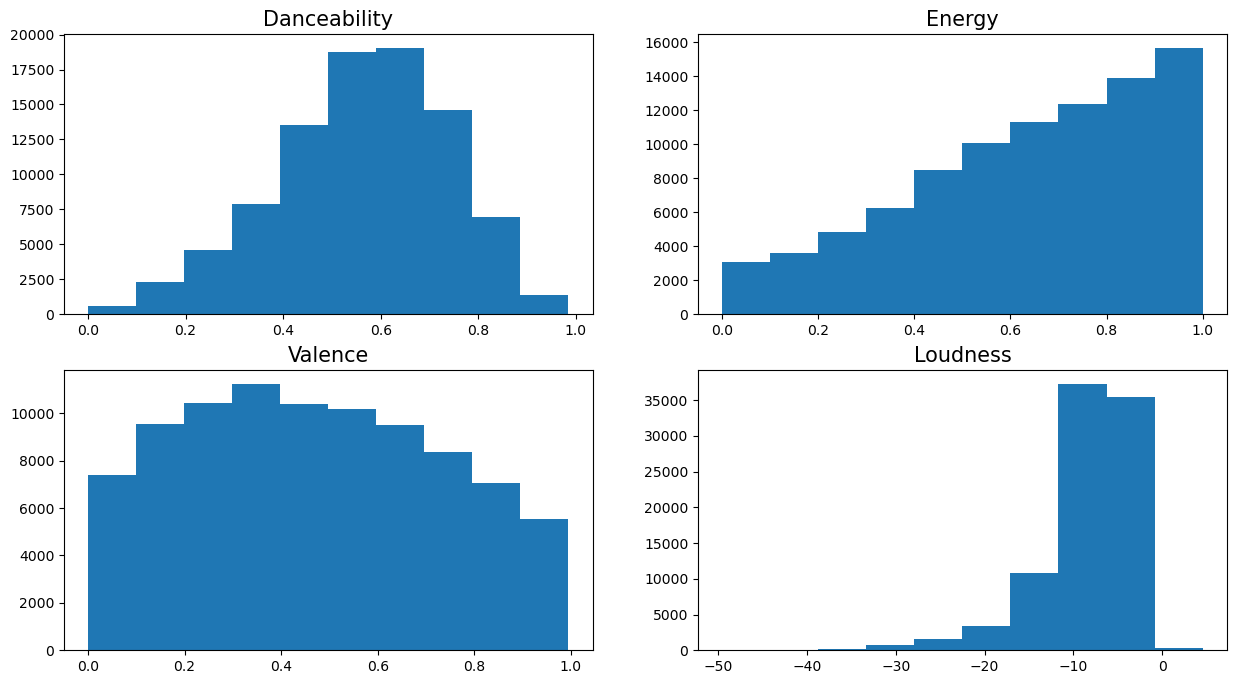

In [413]:
fig,axes = plt.subplots(2,2,figsize=(15,8))

axes[0,0].hist(df['danceability'])
axes[0,0].set_title('Danceability',fontsize=15)
axes[0,1].hist(df['energy'])
axes[0,1].set_title('Energy',fontsize=15)
axes[1,0].hist(df['valence'])
axes[1,0].set_title('Valence',fontsize=15)
axes[1,1].hist(df['loudness'])
axes[1,1].set_title('Loudness',fontsize=15)
plt.show()

In [415]:
df.describe()


popularity    duration_s  danceability        energy      loudness  \
count  89741.000000  89741.000000  89741.000000  89741.000000  89741.000000   
mean      33.198438    229.141812      0.562166      0.634458     -8.499004   
std       20.580824    112.947741      0.176691      0.256605      5.221490   
min        0.000000      0.000000      0.000000      0.000000    -49.531000   
25%       19.000000    173.040000      0.450000      0.457000    -10.322000   
50%       33.000000    213.293000      0.576000      0.676000     -7.185000   
75%       49.000000    264.293000      0.692000      0.853000     -5.108000   
max      100.000000   5237.295000      0.985000      1.000000      4.532000   

          mode   speechiness  acousticness  instrumentalness      liveness  \
count  89741.0  89741.000000  89741.000000      89741.000000  89741.000000   
mean       0.0      0.087442      0.328289          0.173413      0.216970   
std        0.0      0.113277      0.338321          0.323848      0.194884   
min        0.0      0.000000      0.000000          0.000000      0.000000   
25%        0.0      0.036000      0.017100          0.000000      0.098200   
50%        0.0      0.048900      0.188000          0.000058      0.132000   
75%        0.0      0.085900      0.625000          0.097600      0.279000   
max        0.0      0.965000      0.996000          1.000000      1.000000   

            valence         tempo             0             1             3  \
count  89741.000000  89741.000000  89741.000000  89741.000000  89741.000000   
mean       0.469477    122.058316      0.001805      0.009427      0.084733   
std        0.262864     30.117532      0.042449      0.096635      0.278485   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.249000     99.264000      0.000000      0.000000      0.000000   
50%        0.457000    122.013000      0.000000      0.000000      0.000000   
75%        0.682000    140.077000      0.000000      0.000000      0.000000   
max        0.995000    243.372000      1.000000      1.000000      1.000000   

                  4             5  
count  89741.000000  89741.000000  
mean       0.886373      0.017662  
std        0.317359      0.131720  
min        0.000000      0.000000  
25%        1.000000      0.000000  
50%        1.000000      0.000000  
75%        1.000000      0.000000  
max        1.000000      1.000000

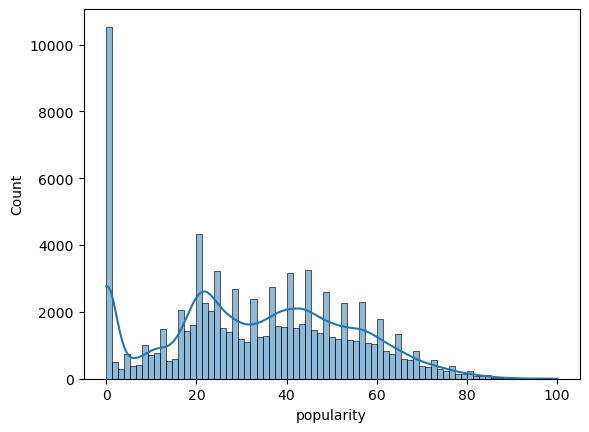


 0      9448
21     2271
22     2258
20     2058
23     2038
       ... 
97        2
95        2
94        2
100       1
99        1
Name: popularity, Length: 101, dtype: int64


In [417]:
# Distribution plot of song_popularity (target)
sns.histplot(df['popularity'], kde=True)
plt.show()

# The distribution of song popularity needs to be validated.

print("\n", df['popularity'].value_counts())

In [419]:
df["track_genre"].value_counts()



acoustic     1000
alt-rock      999
tango         999
ambient       999
afrobeat      999
             ... 
metal         232
punk          226
house         210
indie         134
reggaeton      74
Name: track_genre, Length: 113, dtype: int64

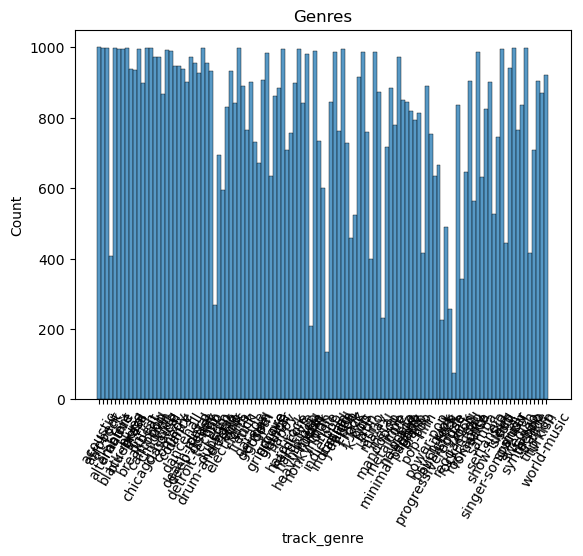

In [421]:
ax = sns.histplot(df["track_genre"])
_ = plt.xticks(rotation=60)
_ = plt.title("Genres")

C:\Users\Admin\AppData\Local\Temp\ipykernel_9468\809261920.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='coolwarm', annot=True)


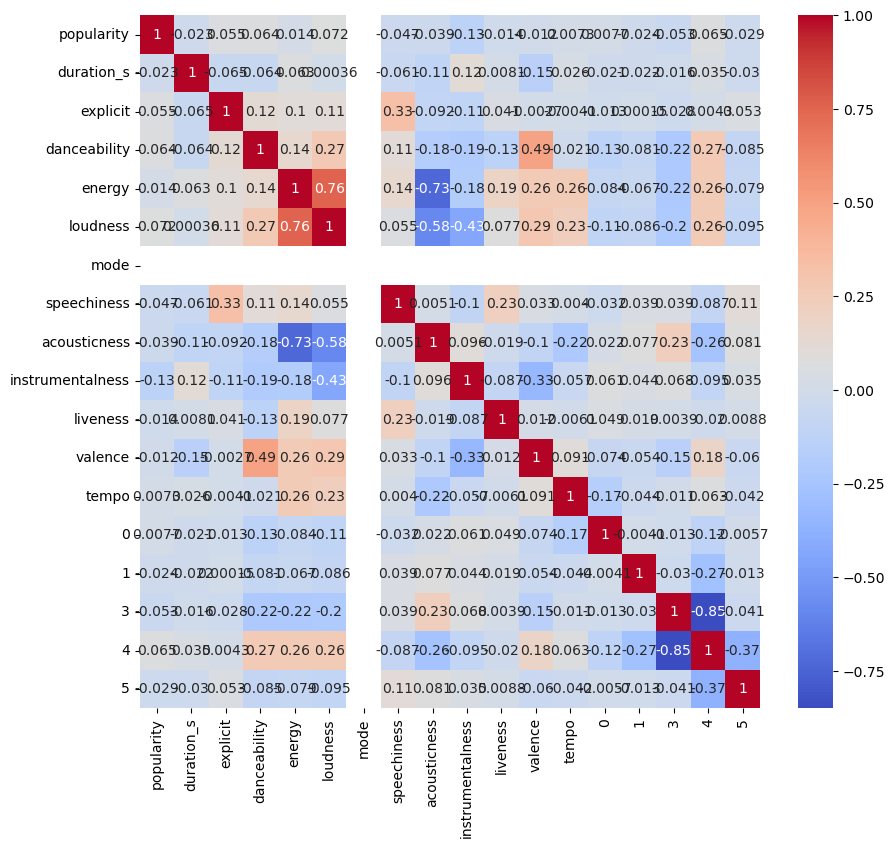

In [423]:
plt.subplots(figsize=(10,9))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

In [427]:
x = df.loc[:,:"tempo"]
y = df["track_genre"]


Text(0.5, 0.92, '3D Scatter Plot of Songs Clustered')

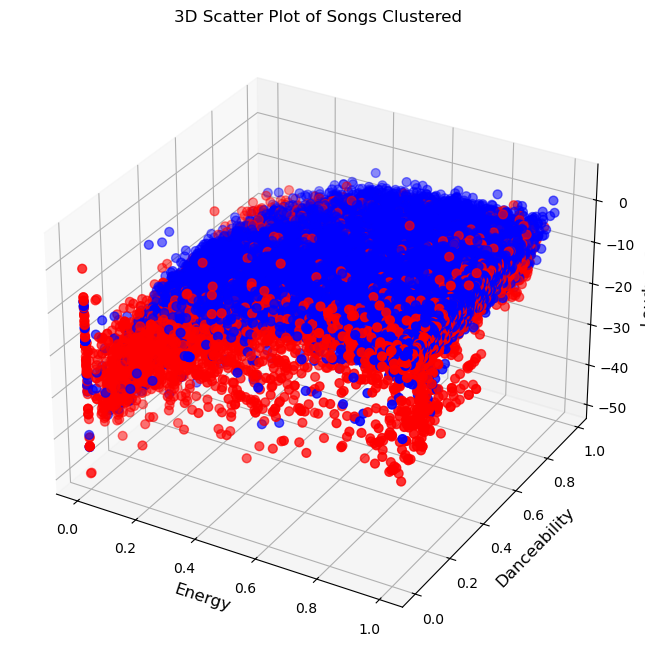

In [429]:
col_features = df.columns[6:13]
X = MinMaxScaler().fit_transform(df[col_features])
kmeans = KMeans(init="k-means++",n_clusters=2,random_state=15).fit(X)
df['kmeans'] = kmeans.labels_
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

x = df['energy']
y = df['danceability']
z = df['loudness']
cmhot = cmhot = plt.get_cmap('bwr')

ax.scatter(x,y,z,c=df['kmeans'],s=40,cmap=cmhot)
ax.set_xlabel('Energy',fontsize=12)
ax.set_ylabel('Danceability',fontsize=12)
ax.set_zlabel('Loudness',fontsize=12)
ax.set_title("3D Scatter Plot of Songs Clustered")

In [430]:
df.groupby(['kmeans']).mean()


C:\Users\Admin\AppData\Local\Temp\ipykernel_9468\1888085166.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['kmeans']).mean()


popularity  duration_s  explicit  danceability    energy   loudness  \
kmeans                                                                        
0        34.418330  222.654793  0.100443      0.578769  0.656964  -7.437671   
1        28.166581  255.899702  0.025641      0.493679  0.541625 -12.876829   

        mode  speechiness  acousticness  instrumentalness  liveness   valence  \
kmeans                                                                          
0        0.0     0.092607      0.312159          0.020148  0.224902  0.512623   
1        0.0     0.066137      0.394823          0.805607  0.184249  0.291508   

             tempo         0         1         3         4         5  
kmeans                                                                
0       122.876685  0.000554  0.007448  0.075800  0.900775  0.015423  
1       118.682680  0.006967  0.017589  0.121581  0.826966  0.026897

In [431]:
cluster_0 = df[df['kmeans']==0]
cluster_1  = df[df['kmeans']==1]
#TODO

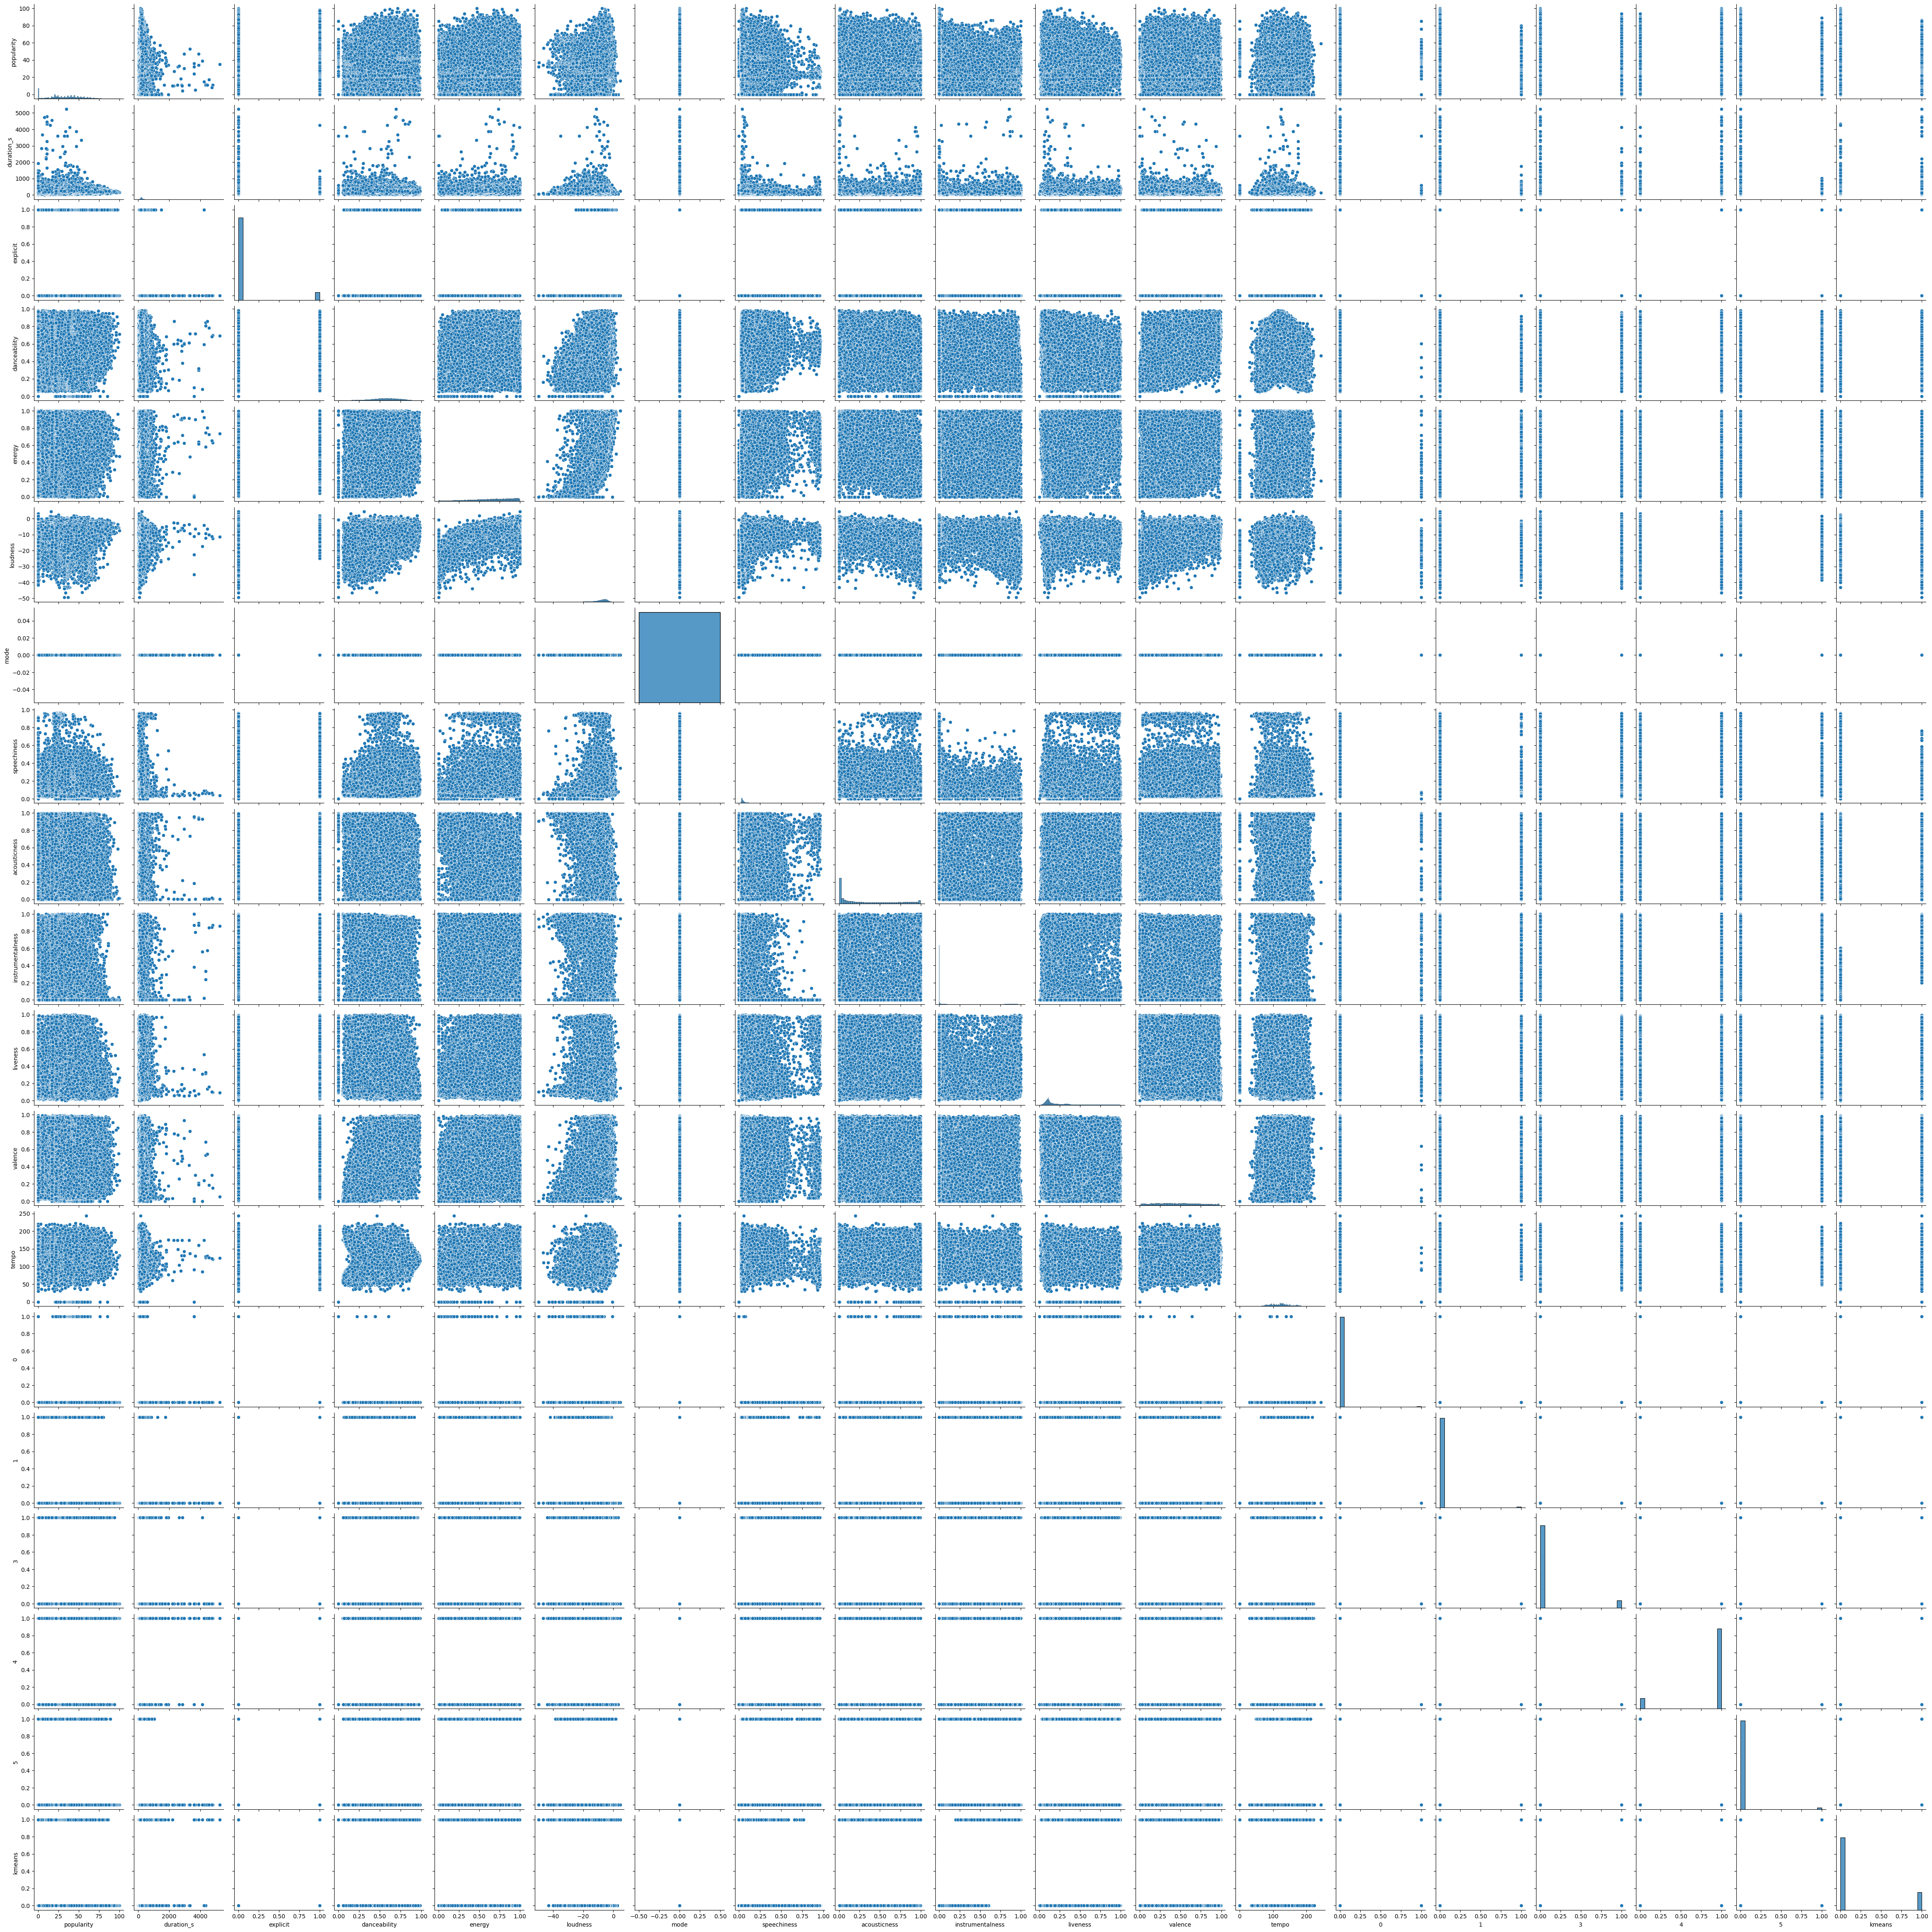

In [432]:
sns.pairplot(df)
plt.show()

In [433]:
# Calculate pearson coefficient to check for linearity between pairs of features
df.corr()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9468\1199577506.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


popularity  duration_s  explicit  danceability    energy  \
popularity          1.000000   -0.023119  0.054902      0.064281  0.013728   
duration_s         -0.023119    1.000000 -0.065365     -0.064130  0.063261   
explicit            0.054902   -0.065365  1.000000      0.119116  0.100696   
danceability        0.064281   -0.064130  0.119116      1.000000  0.143914   
energy              0.013728    0.063261  0.100696      0.143914  1.000000   
loudness            0.071676    0.000364  0.109049      0.271839  0.758774   
mode                     NaN         NaN       NaN           NaN       NaN   
speechiness        -0.047081   -0.060744  0.328201      0.109520  0.141332   
acousticness       -0.038847   -0.108499 -0.091511     -0.177043 -0.732566   
instrumentalness   -0.127465    0.117381 -0.112075     -0.194747 -0.181037   
liveness           -0.013844    0.008126  0.041332     -0.132234  0.188941   
valence            -0.011526   -0.147037 -0.002713      0.492571  0.256313   
tempo               0.007270    0.025991 -0.004072     -0.021331  0.258628   
0                   0.007715   -0.021141 -0.013032     -0.132264 -0.083635   
1                  -0.024098   -0.021529  0.000154     -0.081052 -0.066619   
3                  -0.053274   -0.015628 -0.027822     -0.217412 -0.220718   
4                   0.064975    0.035496  0.004309      0.268637  0.257924   
5                  -0.028723   -0.029872  0.052525     -0.085496 -0.078955   
kmeans             -0.120383    0.116647 -0.105819     -0.190849 -0.178130   

                  loudness  mode  speechiness  acousticness  instrumentalness  \
popularity        0.071676   NaN    -0.047081     -0.038847         -0.127465   
duration_s        0.000364   NaN    -0.060744     -0.108499          0.117381   
explicit          0.109049   NaN     0.328201     -0.091511         -0.112075   
danceability      0.271839   NaN     0.109520     -0.177043         -0.194747   
energy            0.758774   NaN     0.141332     -0.732566         -0.181037   
loudness          1.000000   NaN     0.055295     -0.582663         -0.434717   
mode                   NaN   NaN          NaN           NaN               NaN   
speechiness       0.055295   NaN     1.000000      0.005121         -0.099658   
acousticness     -0.582663   NaN     0.005121      1.000000          0.096065   
instrumentalness -0.434717   NaN    -0.099658      0.096065          1.000000   
liveness          0.077239   NaN     0.225102     -0.019081         -0.087152   
valence           0.289091   NaN     0.032932     -0.103767         -0.330759   
tempo             0.228659   NaN     0.004032     -0.220244         -0.056888   
0                -0.109378   NaN    -0.032112      0.021763          0.061461   
1                -0.085866   NaN     0.039150      0.077381          0.043586   
3                -0.204469   NaN     0.039484      0.227802          0.067644   
4                 0.259835   NaN    -0.086647     -0.259917         -0.095410   
5                -0.095497   NaN     0.106912      0.080823          0.035080   
kmeans           -0.412822   NaN    -0.092604      0.096830          0.961187   

                  liveness   valence     tempo         0         1         3  \
popularity       -0.013844 -0.011526  0.007270  0.007715 -0.024098 -0.053274   
duration_s        0.008126 -0.147037  0.025991 -0.021141 -0.021529 -0.015628   
explicit          0.041332 -0.002713 -0.004072 -0.013032  0.000154 -0.027822   
danceability     -0.132234  0.492571 -0.021331 -0.132264 -0.081052 -0.217412   
energy            0.188941  0.256313  0.258628 -0.083635 -0.066619 -0.220718   
loudness          0.077239  0.289091  0.228659 -0.109378 -0.085866 -0.204469   
mode                   NaN       NaN       NaN       NaN       NaN       NaN   
speechiness       0.225102  0.032932  0.004032 -0.032112  0.039150  0.039484   
acousticness     -0.019081 -0.103767 -0.220244  0.021763  0.077381  0.227802   
instrumentalness -0.087152 -0.330759

In [ ]:
df['track_genre'].describe()
df = df.drop(axis=1, labels='track_genre')

C:\Users\Admin\AppData\Local\Temp\ipykernel_9468\1797857307.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(df.corr())
C:\Users\Admin\AppData\Local\Temp\ipykernel_9468\1797857307.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,linewidths=0.4,ax=ax,cmap="coolwarm",mask=mask)


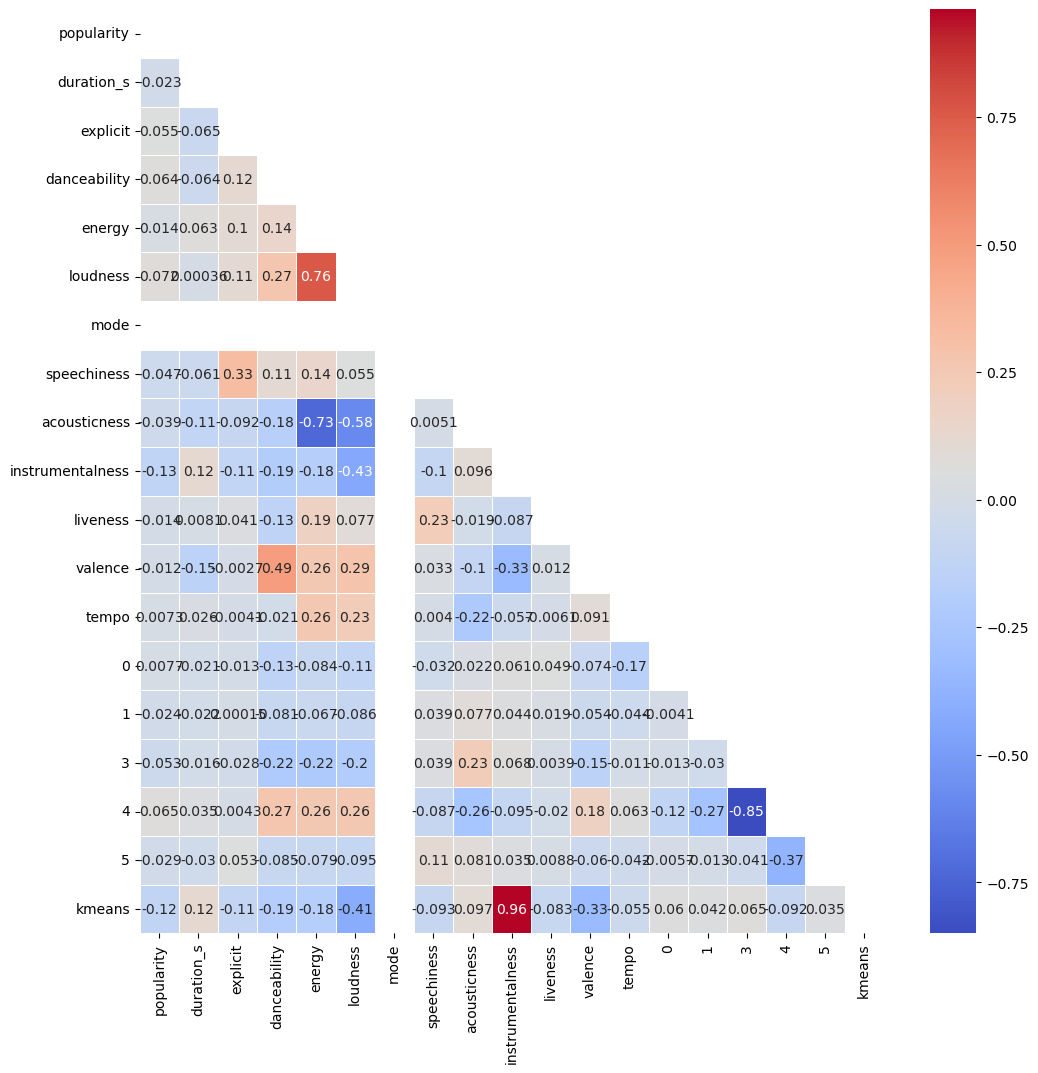

In [312]:
# Plot song_data.corr() into a heatmap to easily identify pairs with stronger correlations
#Analysis of the pair plot & heat map for correlations

f,ax = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df.corr(), annot=True,linewidths=0.4,ax=ax,cmap="coolwarm",mask=mask)
plt.show() 

In [439]:
X= df.loc[:,df.columns !="popularity"] # all the features accept DV
y = df["popularity"] # the DV

In [441]:
# separate the data to training and testing
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2)
# save as np.array
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train) 
y_test = np.array(y_test)
#The y vector contains the songs’ “popularity” score

In [443]:
# create a linear regression, random forest & decision tree object
model_regression = linear_model.LinearRegression()
model_random_forest = RandomForestRegressor()
model_decision_tree = DecisionTreeRegressor()
#TODO